## Análise rápida dos dados de óbito por Dengue em todo o Brasil

O conjunto de dados, contém os casos notificados de dengue que evoluíram para óbito. O cálculo de acordo com o `Ministério da Saúde` (MS), foi realizado utilizando números absolutos.

O ano base utilizado para o cálculo foi de 2010, atualizado anualmente. Escolhemos analisar estes dados, para entender quais regiões apresentam o maior número de registros de óbitos por dengue.

Conjunto de dados disponibilizados em: http://dados.gov.br/dataset/odm6_dengue

In [1]:
import pandas as pd
from plotnine import *

Carregando os dados

In [2]:
df_dengue = pd.read_csv('../../../dados/obitos-dengue/obitos_dengue.csv', sep = ',')

Com os dados já carregados podemos começar a análise, inicialmente vamos explorar o dado, para começar a pensar em quais informações podemos obter através destes dados.

In [3]:
# Exibindo os 5 primeiros itens do DataFrame.
df_dengue.head(5)

,indicx,no_cidade
0,0,Alta Floresta D'Oeste
1,0,Ariquemes
2,0,Cabixi
3,4,Cacoal
4,1,Cerejeiras


Veja que, há dois atributos dentro deste DataFrame, o `indicx`, que representa o índice de casos, e o `no_cidade`, que representa o nome da cidade.

Bem, com esta informação básica, vamos entar obter informações gerais dos índices de casos presentes nos dados.

In [4]:
# Visão geral (estatística) dos dados
df_dengue.describe()

,indicx
count,5565.000000
mean,0.117880
std,0.915624
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,28.000000


Veja que, ao utilizar o método `describe` conseguimos perceber que, além da média baixa, a cidade com maior indice de casos, tem 28, enquanto o mais baixo possui 0.

Isto já é um primeiro passo na análise, vamos evoluir ela, descobrindo o nome da cidade com o maior índice, que anteriormente haviamos constatado como 28. 

## Cidade com maior índice de mortes causados por dengue

Como citado acima, vamos verificar qual a cidade com o maior índice de mortes causados por dengue. Para isto utilizamos o método `query` presente dentro do `Pandas.DataFrame`

In [5]:
df_dengue.query('indicx == indicx.max()')

,indicx,no_cidade
3477,28,Guarujá


Perceba que conseguimos chegar a cidade de `Guarujá`, este já pode ser considerado uma informação obtida desta análise. Lembre-se, nem sempre a análise trará resultados grandiosos, em vários casos apenas uma simples informação já é de grande ajuda. Porém, neste caso, como este foi apenas o primeiro passo, vamos tentar descobrir mais coisas deste conjunto de dados.

Vamos tentar agora verificar as 10 cidades com maior incidência de óbitos por dengue.

In [6]:
# Ordenamos os valores, e inserimos o argumento ascending como False
# Logo, se a ordem crescente (ascending) é falsa, a ordenação será decrescente
df_dengue.sort_values('indicx', ascending=False).head(10)

,indicx,no_cidade
3477,28,Guarujá
3808,24,Santos
5412,21,Goiânia
5118,21,Campo Grande
2308,16,Belo Horizonte
3835,15,São Vicente
2662,13,Juiz de Fora
3822,11,São José do Rio Preto
169,11,Belém
3725,10,Praia Grande


Opa! Vemos que recuperamos as dez cidades, da que possui a maior quantidade para aquela que possui a menor quantidade, muito bacana =D

Agora, olhando estes números, foi possível perceber que pode-se haver grupos de cidades com a mesma quantidade de óbitos, vamos então, agrupar os dados pelos valores dos indices para verificar quantos possíveis grupos são.

In [7]:
grupos_cidades_por_indice = df_dengue.groupby('indicx').agg('count')

No comando acima, agrupamos as cidades através do índice de óbitos, assim, aquelas que tem o mesmo índice ficarão todos em um mesmo grupo. Após o agrupamento com o método `groupby`, uma agregação é utiliza para fazer com que, a quantidade de cidades em cada grupo seja contada.

In [8]:
grupos_cidades_por_indice.head(4) # Exibe os 4 primeiros elementos

,no_cidade
indicx,
0,5279
1,188
2,44
3,15


Bem, agora, vou `classificar` cada cidade, as classes utilizadas serão os valores do índice do mesmo conjunto de dados, isto está sendo feito basicamente para que, cada grupo fique explicitamente registrado no DataFrame, e não somente através do indice.

In [9]:
grupos_cidades_por_indice.insert(0, 'classe', grupos_cidades_por_indice.index)

In [10]:
grupos_cidades_por_indice.head(5)

,classe,no_cidade
indicx,,
0,0,5279
1,1,188
2,2,44
3,3,15
4,4,8


Ao olhar o DataFrame acima, percebe-se que, o indice tem o mesmo valor que o atributo que foi nomeado de classe, porém a diferença é que, estes valores estarão disponíveis dentro do DataFrame.

Vamos agora fazer um `plot` para entender como estes valores estão divididos. No plot a classe de valores zero será excluído por conter muitos valores e dificultar a visualização de grupos que possuem poucas cidades.

In [11]:
# Removendo as classes zero
grupos_cidades_por_indice_sem_zero = grupos_cidades_por_indice[grupos_cidades_por_indice['classe'] != 0]

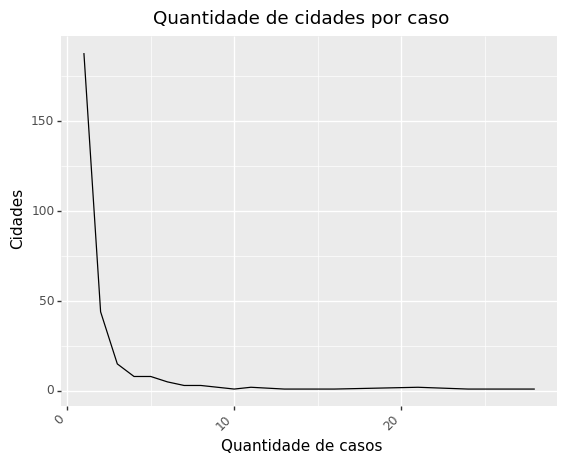

<ggplot: (8741300311286)>

In [12]:
(ggplot(grupos_cidades_por_indice_sem_zero, aes(x = 'classe', y = 'no_cidade')) +
 geom_line()  + 
 labs(title = 'Quantidade de cidades por caso',
       y = 'Cidades',
       x = 'Quantidade de casos') + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)))

Olha que legal! Com o plot conseguimos entender bem melhor com é feito a distribuição de `Cidades X Quantidades de Casos`, perceba que, quanto maior a quantidade de casos, menor a quantidade de cidades com esta característica.

Ao olhar o gráfico algumas dúvidas surgiram, será que nos valores demonstrados há capitais, e ainda, quais os valores médios das cidades com algum caso de óbito.

## Índice médio de casos de dengue

Para facilitar a análise, nesta etapa será feito um filtro, já que, como queremos obter os valores médios, muitas quantidades de zero podem representar problemas no momento da obtenção da estatística, isto como ocorreu no início deste documento.

Veja que, no caso deste conjunto de dados não há problemas em remover os valores com índice zero, porém, dependendo do dado, pode-se ter problemas ao remover valores do conjunto de dados.

In [13]:
cidades_com_algum_caso = df_dengue.query('indicx >= 1')

Vamos verificar quantos valores tinham e quantos ficaram após este filtro.

In [14]:
num_cidades_com_caso = len(cidades_com_algum_caso)
num_gerais = len(df_dengue)

print('{} - cidades com algum caso de dengue'.format(num_cidades_com_caso))
print('{} - Número geral de cidades no conjunto de dados'.format(num_gerais))

286 - cidades com algum caso de dengue
5565 - Número geral de cidades no conjunto de dados


Vamos agora obter a média dos índices.

In [15]:
cidades_com_algum_caso['indicx'].mean()

2.2937062937062938

bem vamos obter cidades que possuem casos maiores ou iguais a média.

In [16]:
cidades_medias = cidades_com_algum_caso.query('indicx >= indicx.mean()')

In [17]:
cidades_com_algum_caso['indicx'].mean()

2.2937062937062938

Vamos olhar algumas cidades com valores iguais ou acima da média. Lembre-se que, esta é a média dos valores entre as cidades que possuem algum caso de óbito.

In [18]:
cidades_medias.head(5)

,indicx,no_cidade
3,4,Cacoal
66,8,Rio Branco
111,5,Manaus
138,4,Boa Vista
160,3,Ananindeua


Bem, agora nos já temos o conjunto de cidades que tem valores iguais ou superiores a média de índices de óbito causados por dengue. Certo, vamos então filtrar estes dados para tentar descobrir se alguma capital está dentro deste índice.

In [19]:
capitais = ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Porto Alegre", "Curitiba", "Florianópolis",
                "Goiânia", "Salvador", "Brasília", "Fortaleza", "Recife", "Manaus", "Vitória",
                "Belém", "Natal", "Cuiabá", "São Luís", "João Pessoa", "Campo Grande", "Maceió", "Aracaju",
                "Teresina", "Palmas", "Boa Vista", "Porto Velho", "Rio Branco"]

In [20]:
capitais_com_casos = cidades_medias[cidades_medias['no_cidade'].isin(capitais)]

In [21]:
capitais_com_casos.head(5)

,indicx,no_cidade
66,8,Rio Branco
111,5,Manaus
138,4,Boa Vista
169,11,Belém
634,3,São Luís


Pronto! Vamos agora fazer um plot para verificar o número de casos em cada capital identificada com casos de dengue.

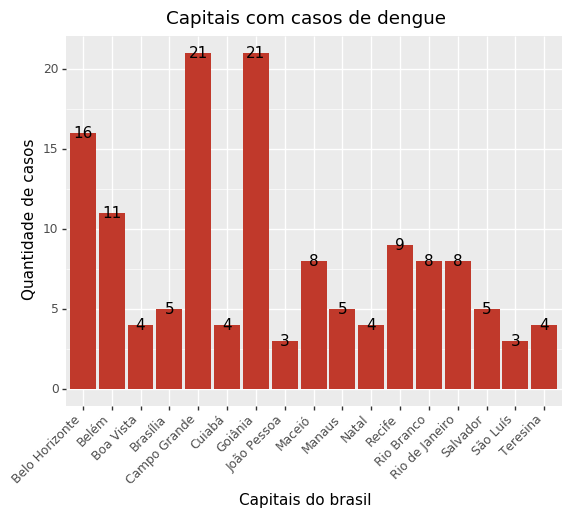

<ggplot: (-9223363295554521635)>

In [22]:
(ggplot(capitais_com_casos, aes(x='no_cidade', y='indicx')) +
  geom_col(fill = "#c0392b") +
  geom_text(aes(label = 'indicx')) +
  labs(title = 'Capitais com casos de dengue',
       y = 'Quantidade de casos',
       x = 'Capitais do brasil') +
  theme(axis_text_x = element_text(angle = 45, hjust = 1)))

Olha só, agora sabemos que Campo Grande e Goiânia tem os maiores indices de óbitos por dengue. Sabemos que ambas capitais pertencem a região do centro-oeste, e uma notícia do G1 indica que este conjunto de dados está correto.

https://g1.globo.com/bemestar/noticia/brasil-tem-62-mortes-por-dengue-em-2018.ghtml